In [6]:
#Jhoan Mauricio Mesa Ramirez
#Grupo_

#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [8]:
# cargamos  los  datos y  se  muestran las primeras 5 filas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dataset.shape

(200, 5)

In [12]:
data=dataset.drop(['Gender'],axis = 1)

In [14]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [16]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


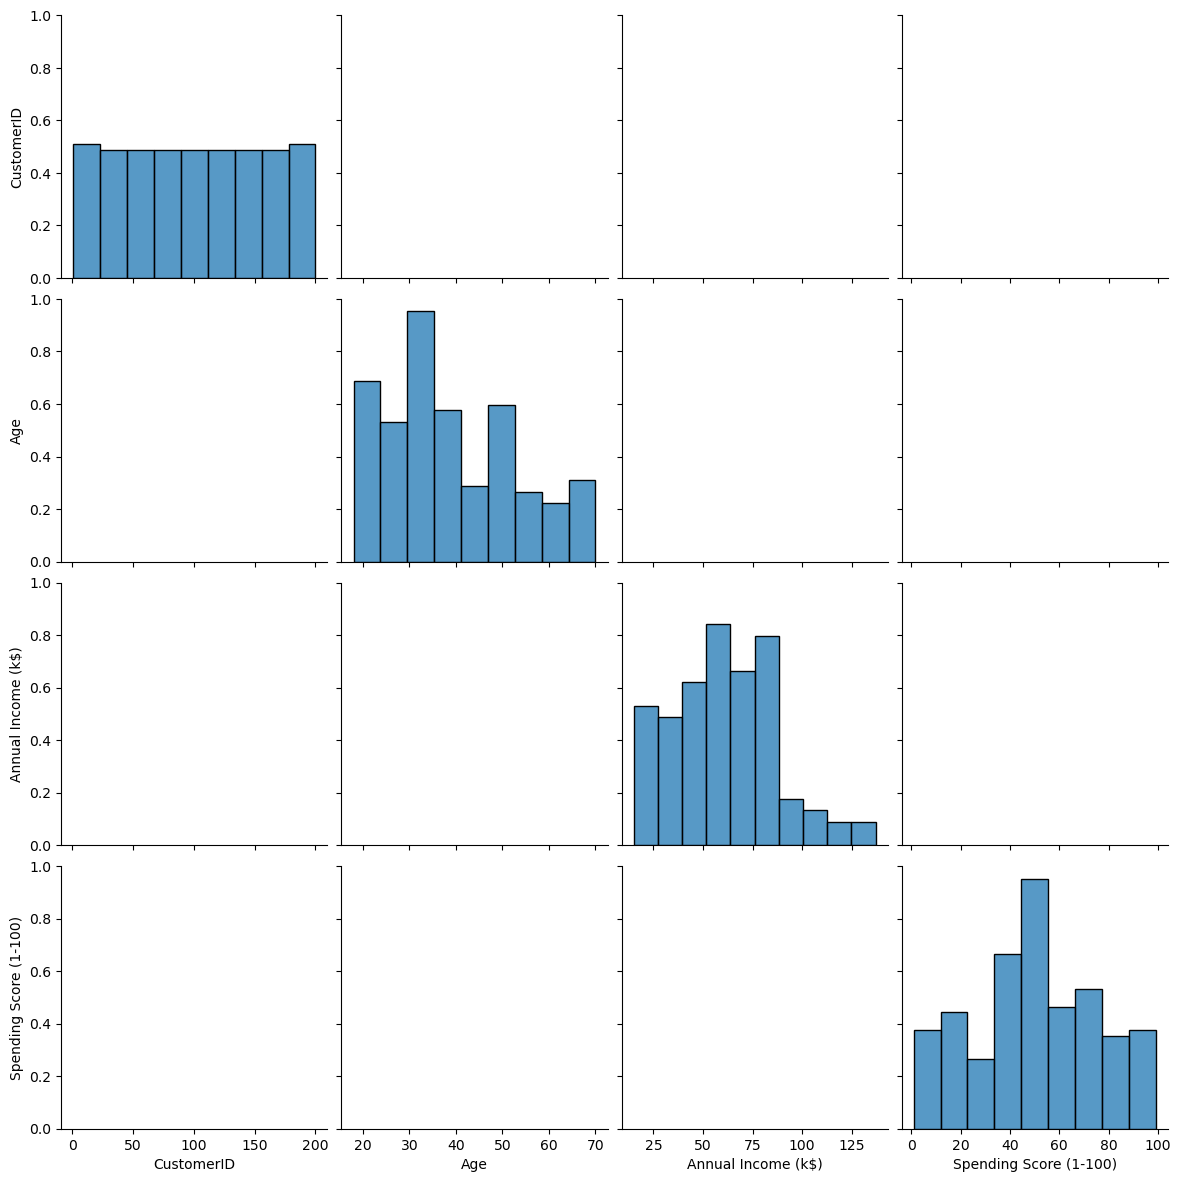

In [22]:
sns.pairplot(data.dropna(), size=3,kind='Scatter')

In [ ]:
#Matriz correlacional

In [24]:
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
# Diagrama  de  clases para cada variable

<Axes: >

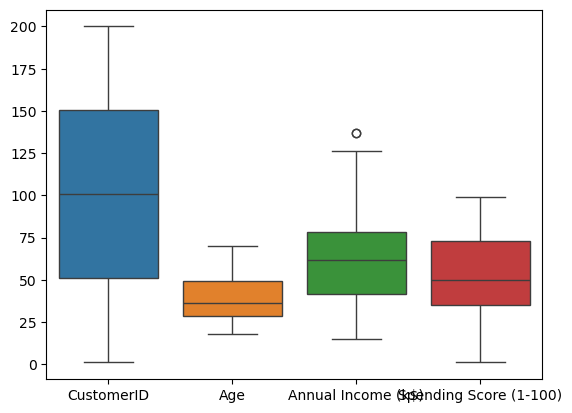

In [26]:
sns.boxplot(data=data)

In [ ]:
# estandaizacion datos 

In [28]:
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
x

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


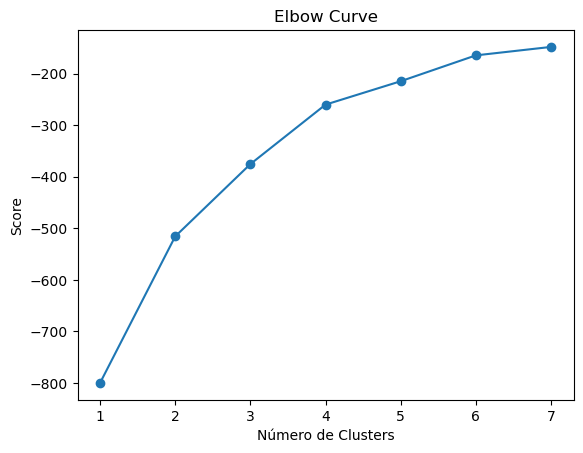

In [30]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[-0.47436436,  1.15787451, -0.42523207, -0.38283068],
       [ 1.01711144, -0.26655566,  0.95170995,  0.07658871],
       [-0.92939362, -0.88065283, -0.8898968 ,  0.30757573]])

In [34]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

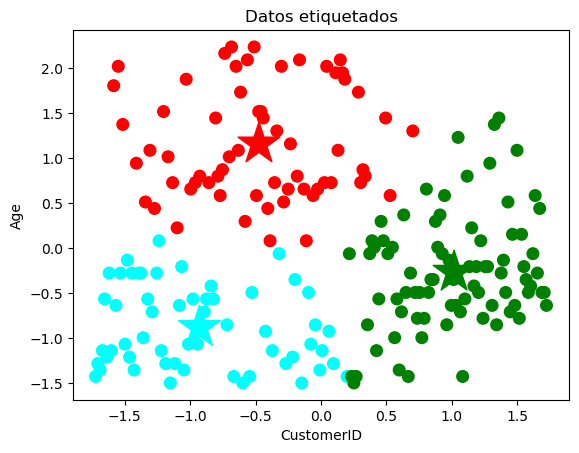

In [36]:
f1 = x['CustomerID'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

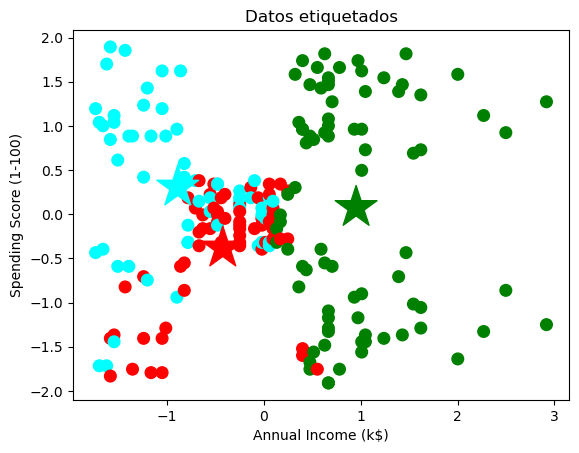

In [38]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

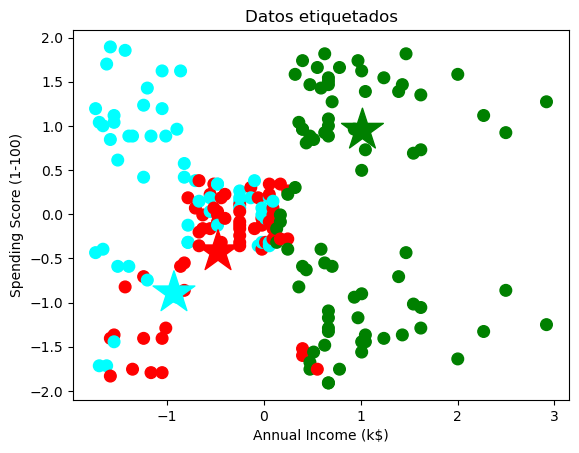

In [40]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [42]:
x_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(x_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[0]
['red']


In [44]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3375693760556384
Índice de Calinski-Harabasz: 111.48533171738879
Inertia (suma de cuadrados dentro de los clusters): 375.2643070614756
Davies-Bouldin Index: 1.0224284884500354


In [ ]:
#clustering


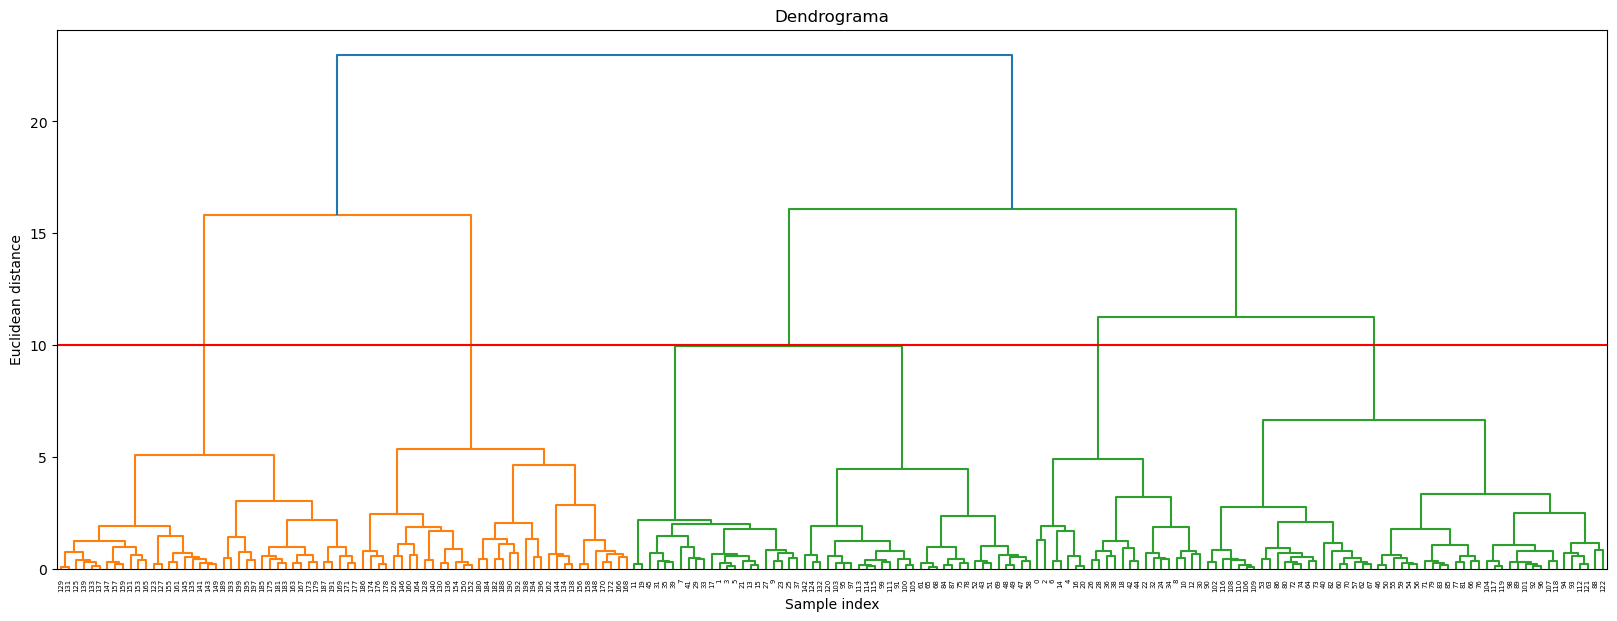

In [46]:
ward_clustering = linkage(x, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [48]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [50]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

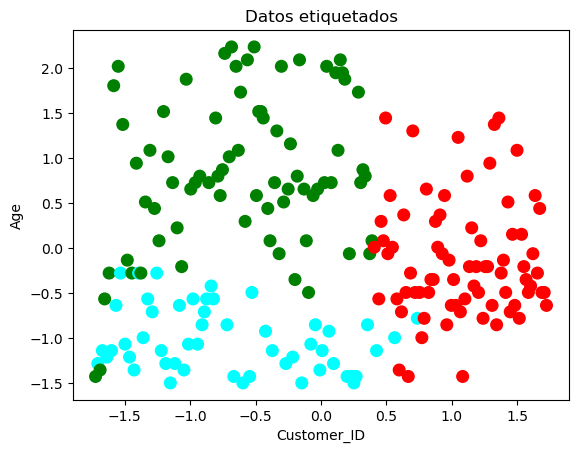

In [52]:
f1 = x['CustomerID'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Customer_ID')
plt.ylabel('Age')
plt.show()

In [104]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [96]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3107636523419464
Índice de Calinski-Harabasz: 97.24151239320494
Davies-Bouldin Index: 1.3111098806113215


In [94]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [68]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.30874740679157575
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934


In [74]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(x)
# Compute the linkage matrix
Z = linkage(x, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


In [ ]:
Los clientes se agruparon en 5 clusters con base en su ingreso anual y puntaje de gasto. Los resultados son los siguientes:
•	Cluster 1: Clientes con ingresos bajos y puntajes de gasto altos (compradores impulsivos).
•	Cluster 2: Clientes con ingresos altos y puntajes de gasto bajos (compradores frugales).
•	Cluster 3: Clientes con ingresos promedio y puntajes de gasto promedio.
•	Cluster 4: Clientes con ingresos altos y puntajes de gasto altos (clientes premium).
•	Cluster 5: Clientes con ingresos bajos y puntajes de gasto bajos (clientes no comprometidos).


In [ ]:
El coeficiente de silueta, que mide la separación y cohesión de los clusters, se utilizó para evaluar la calidad del agrupamiento. Un valor positivo cercano a 1 indicó que los clusters están bien separados

In [ ]:
o	Los clientes se dividen en 5 grupos distintos, cada uno con características únicas.
o	Los clusters permiten identificar segmentos estratégicos como compradores impulsivos y clientes premium
